<a href="https://colab.research.google.com/github/linjac/Thesis/blob/main/data/MeshRIR/meshrir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MeshRIR - Generate IR dataset

https://www.sh01.org/MeshRIR/

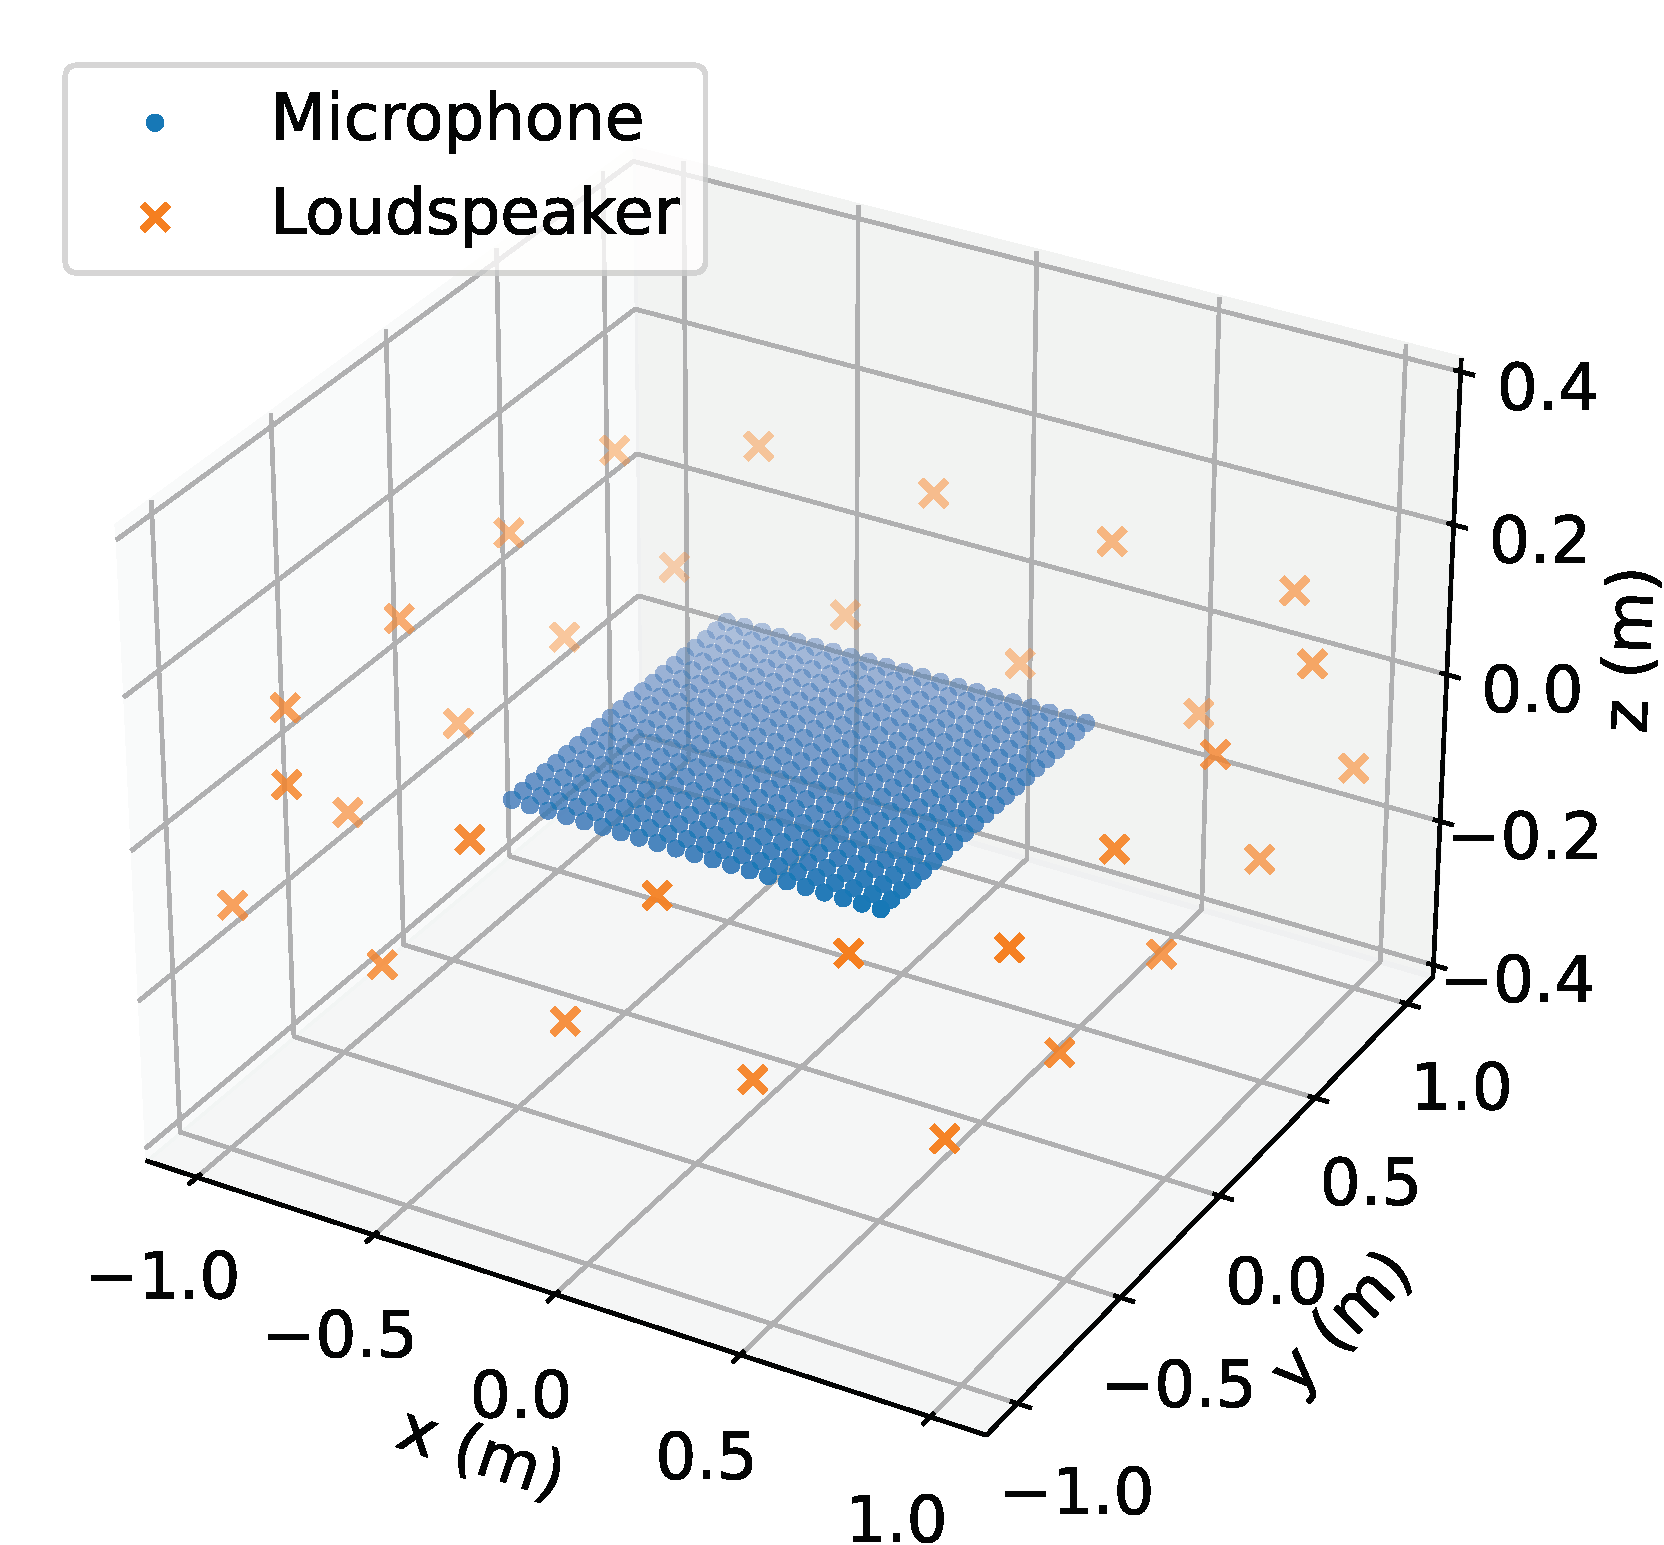

In [1]:

#========== Download data and codes ========== 
%cd /content
!git clone https://github.com/sh01k/MeshRIR.git
%cd /content/MeshRIR
!wget https://zenodo.org/record/5500451/files/S32-M441_npy.zip
!unzip /content/MeshRIR/S32-M441_npy.zip 

/content
Cloning into 'MeshRIR'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 557 (delta 62), reused 68 (delta 52), pack-reused 472
Receiving objects: 100% (557/557), 14.73 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (331/331), done.
/content/MeshRIR
--2023-05-19 07:50:24--  https://zenodo.org/record/5500451/files/S32-M441_npy.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3534777656 (3.3G) [application/octet-stream]
Saving to: ‘S32-M441_npy.zip’

S32-M441_npy.zip    100%[===================>]   3.29G  10.1MB/s    in 32m 31s 

2023-05-19 08:22:58 (1.73 MB/s) - ‘S32-M441_npy.zip’ saved [3534777656/3534777656]

Archive:  /content/MeshRIR/S32-M441_npy.zip
   creating: S32-M441_npy/
  inflating: S32-M441_npy/ir_349.npy  
  inflating: S32-M441_npy/i

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pathlib import Path

import irutilities as irutil

ModuleNotFoundError: ignored

In [ ]:
#========== Load IR data ==========
sessionName = "S32-M441_npy"  # "S32-M441_npy"
sessionPath = Path('.').joinpath(sessionName)
posMic, posSrc, ir = irutil.loadIR(sessionPath)

# Sampling rate
samplerate = 48000

In [2]:
# Select IR data
srcIdx = 0
micIdx = 0
print("Source position (m): ", posSrc[srcIdx, :])
print("Mic position (m): ", posMic[micIdx, :])
print("Numebr of IRs: ", ir.shape)

NameError: ignored

In [ ]:
poop = np.reshape(posSrc[(0),:],(3,-1))
mic = np.reshape(posMic[0, :],(1,-1))
#========== Plot geometry ==========
irutil.drawGeometry(poop, mic)

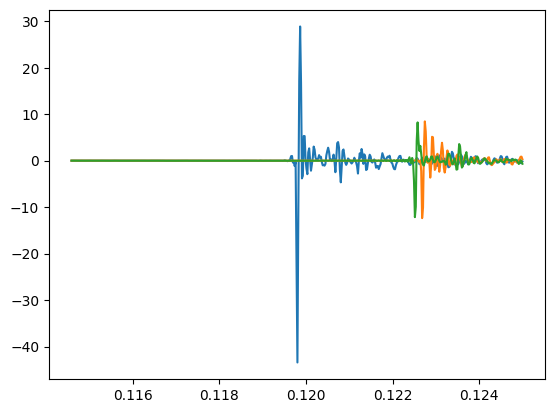

In [72]:
#========== IR plots ==========
def plotIRBeginning(posIdx, micIdx, si=5500, ei=6000):
  ir_plt = ir[posIdx, micIdx, si:ei]
  t = np.linspace(si,ei,ei-si)/samplerate
  plt.plot(t,ir_plt)

plotIRBeginning(0,micIdx)
plotIRBeginning(12,micIdx)
plotIRBeginning(23,micIdx)

RT60 (ms):  142.5


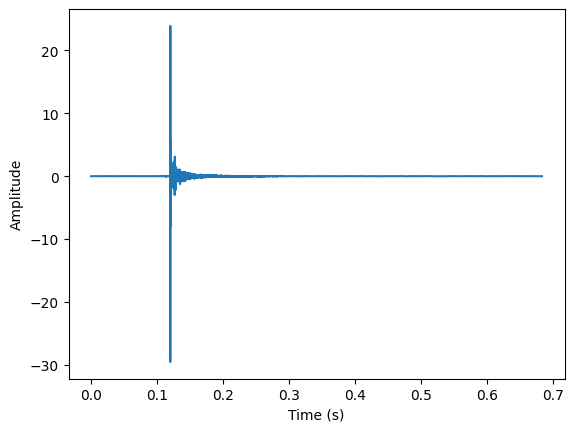

In [64]:
#========== IR plots ==========
ir_plt = ir[0, 1, :]
irutil.irPlots(ir_plt, samplerate)

RT60 (ms):  181.2


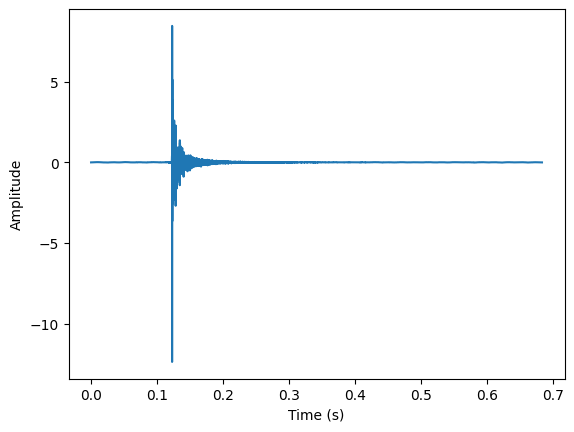

In [18]:
#========== IR plots ==========
ir_plt = ir[12, micIdx, :]
irutil.irPlots(ir_plt, samplerate)

In [31]:
ir_plt = ir[0, micIdx, :]
print(np.argmax(ir_plt))
ir_plt = ir[12, micIdx, :]
print(np.argmax(ir_plt))
ir_plt = ir[23, micIdx, :]
print(np.argmax(ir_plt))


5753
5891
5883


RT60 (ms):  216.4


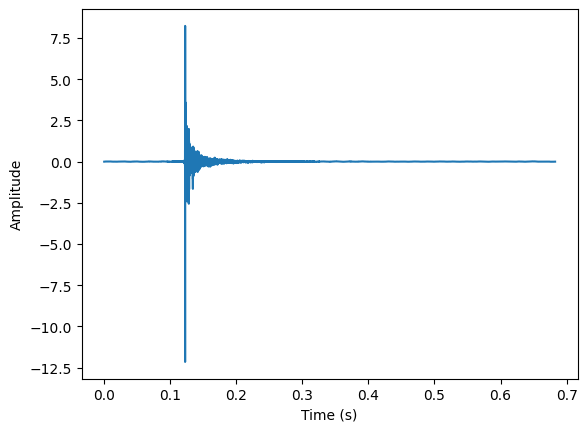

In [19]:
#========== IR plots ==========
ir_plt = ir[23, micIdx, :]
irutil.irPlots(ir_plt, samplerate)